<a href="https://colab.research.google.com/github/devarshilalani/Natural_language_processing/blob/master/Bike_sharing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('hour.csv')
df['dteday']=pd.to_datetime(df['dteday'])

df= df.sort_values(by=['dteday','hr']).reset_index(drop=True)

# remove data leakage columns
drop_cols= ['instant','casual','registered']
df=df.drop(columns=drop_cols)

print(df.shape)
df.head(10)

(17379, 14)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


In [ ]:
# eda
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 1.9 MB
None
                              dteday        seaso

In [ ]:
df.corr(numeric_only=True)['weathersit']

,weathersit
season,-0.014524
yr,-0.019157
mnth,0.005400
hr,-0.020203
holiday,-0.017036
weekday,0.003311
workingday,0.044672
weathersit,1.000000
temp,-0.102640
atemp,-0.105563


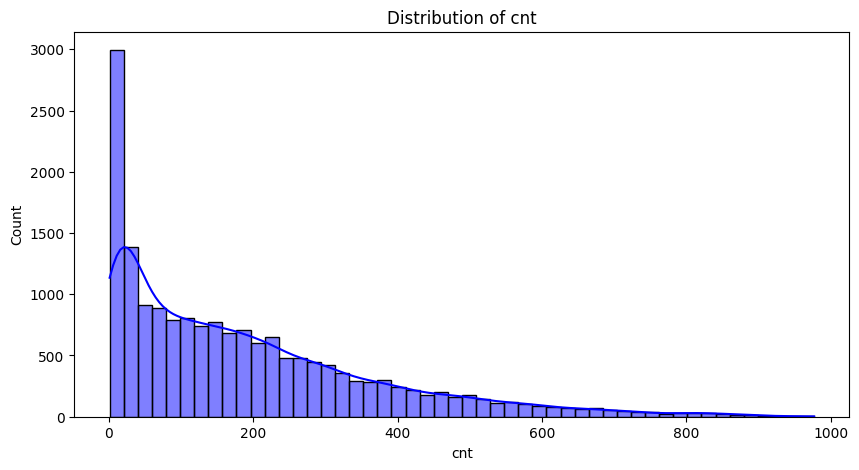

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['cnt'],bins=50,kde=True,color='blue')
plt.title("Distribution of cnt")
plt.show()

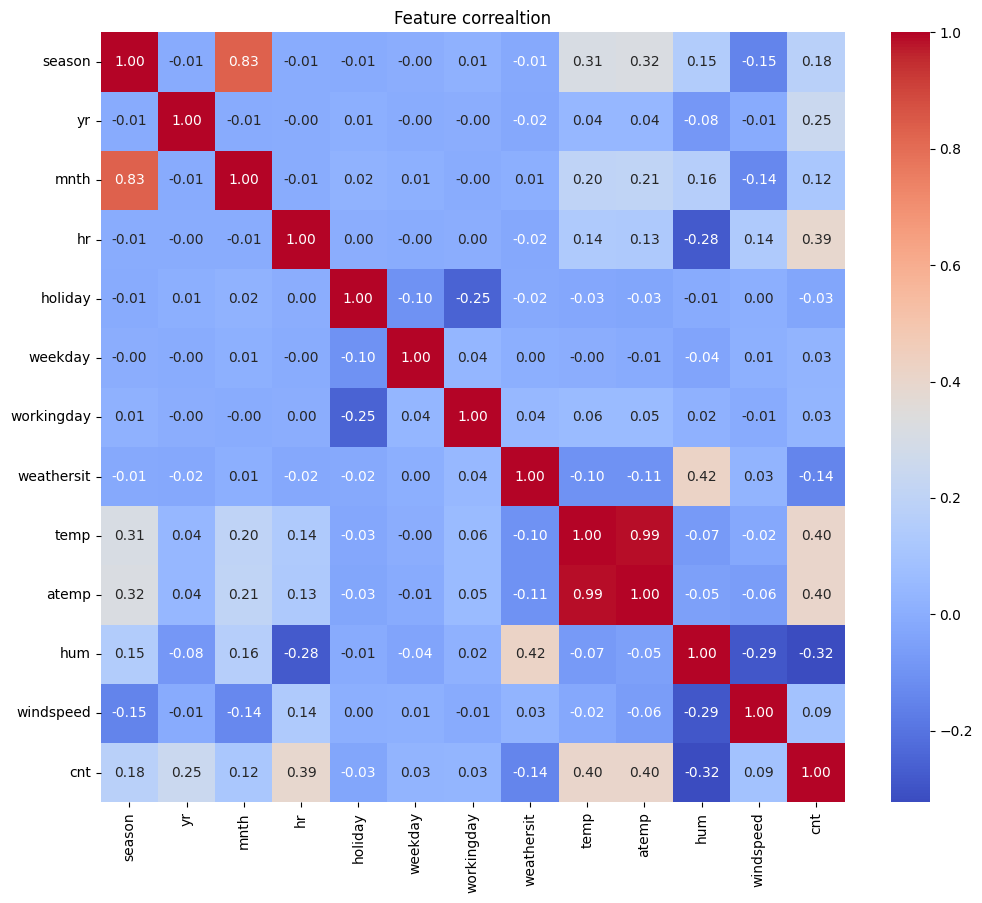

In [ ]:
# corelation heatmap
plt.figure(figsize=(12,10))
numeric_df= df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature correaltion')
plt.show()

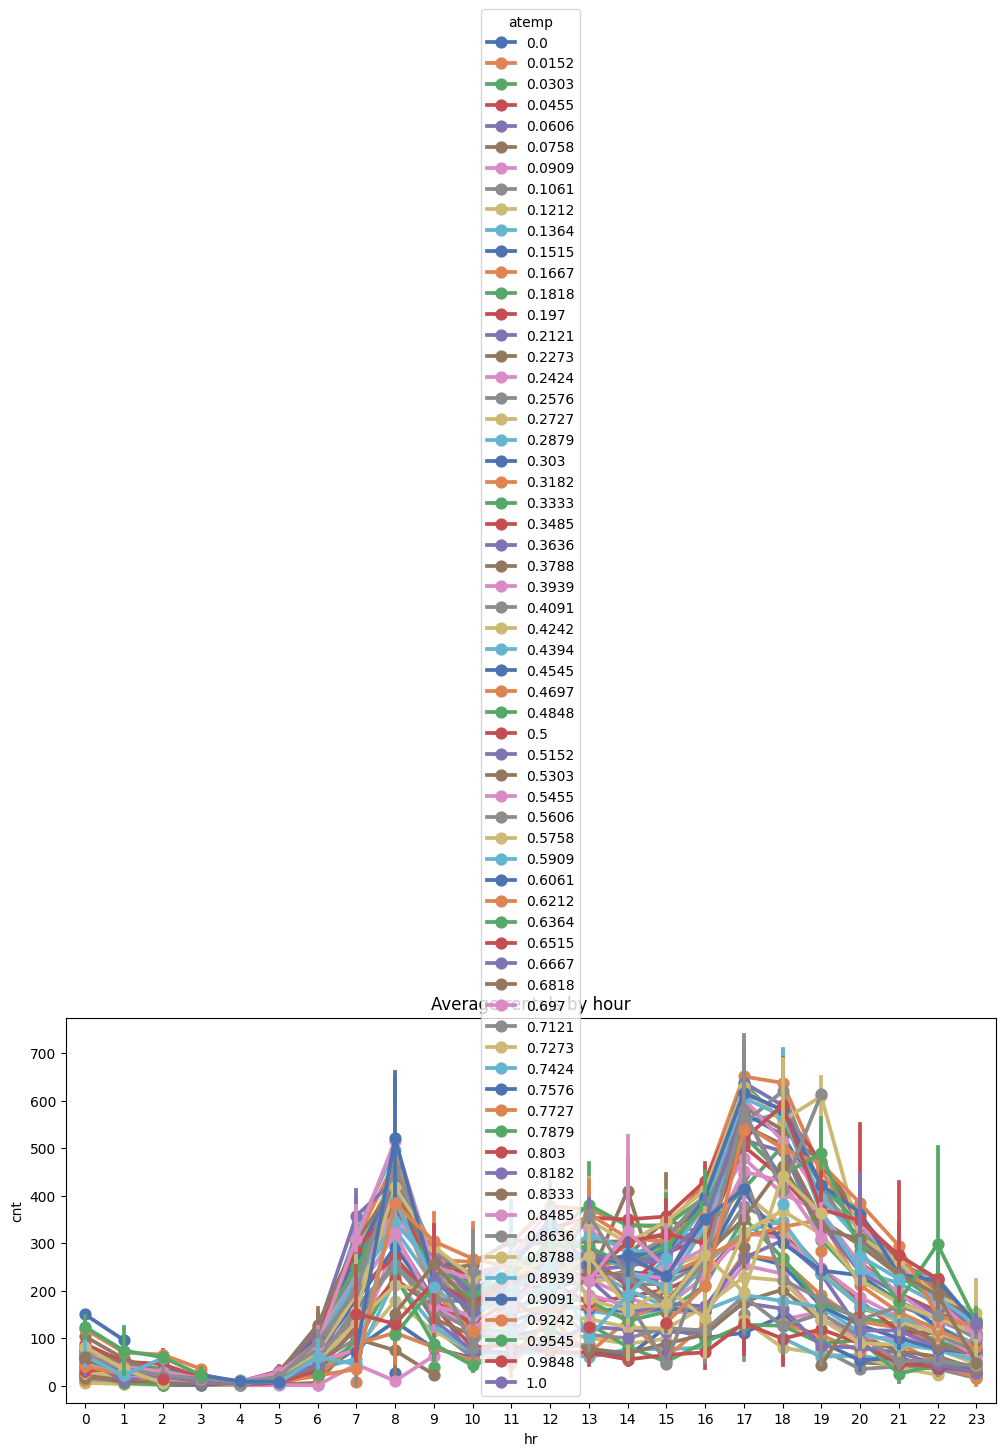

In [ ]:
plt.figure(figsize=(12,5))
sns.pointplot(data=df,x='hr',y='cnt',hue='atemp',palette='deep')
plt.title('Average rentals by hour')
plt.show()

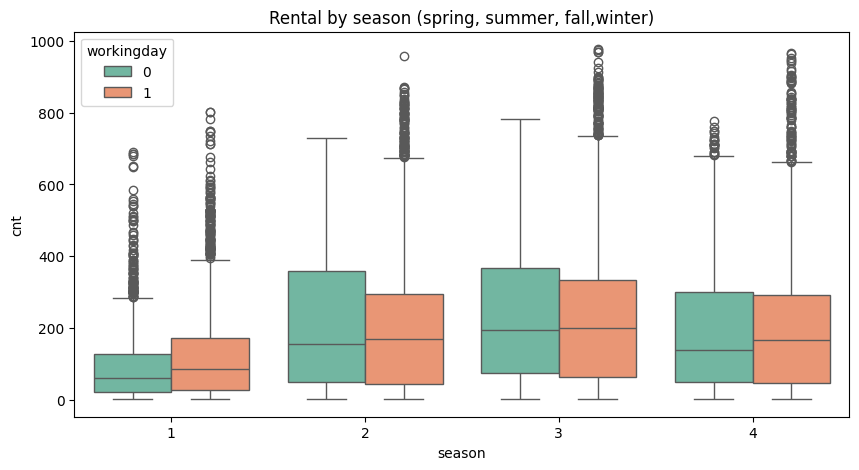

In [ ]:
# rentals by season
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='season',y='cnt',hue='workingday',palette='Set2')
plt.title("Rental by season (spring, summer, fall,winter)")
plt.show()

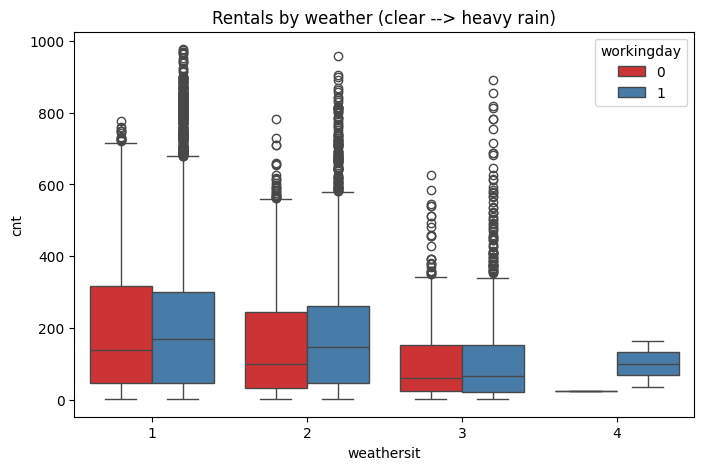

In [ ]:
# rentals by weather situation
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='weathersit',y='cnt',hue='workingday',palette="Set1")
plt.title("Rentals by weather (clear --> heavy rain)")
plt.show()

In [ ]:
# cyclic encoding
def encode_cyclical(df,col,max_val):
  df[col+'_sin']=np.sin(2 * np.pi * df[col]/max_val)
  df[col+'_cos']=np.cos(2* np.pi * df[col]/max_val)
  return df

df= encode_cyclical(df,'hr',23)
df= encode_cyclical(df,'mnth',12)
df= encode_cyclical(df,'weekday',6)

# lag features we will use .shift() to create the past values

df['lag_1']= df['cnt'].shift(1)
df['lag_24']=df['cnt'].shift(24)
df['lag_168']=df['cnt'].shift(168)

In [ ]:
# rolling window use shift by 1  to avoid leakage(target should not be in window)

df['rolling_mean_24'] = df['cnt'].shift(1).rolling(window=24).mean()

df['rolling_std_24'] =df['cnt'].shift(1).rolling(window=24).std()

df.shape
df= df.dropna()
df.shape

(17211, 25)

In [ ]:
categorical_features =['season','yr','holiday','workingday','weathersit']
numerical_features = [
    'temp', 'atemp', 'hum', 'windspeed',
    'hr_sin', 'hr_cos', 'mnth_sin', 'mnth_cos', 'weekday_sin', 'weekday_cos',
    'lag_1', 'lag_24', 'lag_168',
    'rolling_mean_24', 'rolling_std_24'
]

X= df.drop(columns=['cnt','dteday'])
y= df['cnt']

In [ ]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler ,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape[0])
print(X_test.shape[0])

13768
3443


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_features)
    ],remainder='drop'
)

# model train
models={
    "LinearRegression":LinearRegression(),
    "RandomForestRegressor":RandomForestRegressor(n_estimators=50,random_state=42,n_jobs=-1),
    "XGBRegressor":XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
}

results=[]
for name,model in models.items():
  pipeline = Pipeline(steps=[
      ('preprocessor',preprocessor),
      ('model',model)
  ])

  print("Model name",name)
  pipeline.fit(X_train,y_train)

  y_pred = pipeline.predict(X_test)

  mae = mean_absolute_error(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  r2=r2_score(y_test,y_pred)

  results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
  })


result_df= pd.DataFrame(results)
result_df

Model name LinearRegression
Model name RandomForestRegressor
Model name XGBRegressor


,Model,MAE,RMSE,R2 Score
0,LinearRegression,46.173948,70.472649,0.849568
1,RandomForestRegressor,22.197996,36.237748,0.960224
2,XGBRegressor,21.189800,33.823157,0.965348


In [ ]:
# Hyperparameter tuning xgboost

param_grid={
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 6],
    'model__subsample': [0.8, 1.0]
}

xgb_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',XGBRegressor(random_state=42, n_jobs=-1))
])

In [ ]:
tscv= TimeSeriesSplit(n_splits=3)

grid_search = GridSearchCV(estimator=xgb_pipeline,
                           param_grid=param_grid,
                           scoring="neg_mean_squared_error",
                           cv=tscv,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train,y_train)

print(f"Best Params: {grid_search.best_params_}")
best_model= grid_search.best_estimator_
best_model

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Params: {'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 0.8}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed', 'hr_sin',
                                                   'hr_cos', 'mnth_sin',
                                                   'mnth_cos', 'weekday_sin',
                                                   'weekday_cos', 'lag_1',
                                                   'lag_24', 'lag_168',
                                                   'rolling_mean_24',
                                                   'rolling_std_24']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['season', 'yr', 'holiday',
                                                   'workingday'...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=-1,
                              num_parallel_tree=None, ...))])

20.755672454833984
32.85557254806157
0.9673022627830505
['temp', 'atemp', 'hum', 'windspeed', 'hr_sin', 'hr_cos', 'mnth_sin', 'mnth_cos', 'weekday_sin', 'weekday_cos', 'lag_1', 'lag_24', 'lag_168', 'rolling_mean_24', 'rolling_std_24', 'season_2', 'season_3', 'season_4', 'yr_1', 'holiday_1', 'workingday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']
[0.00761078 0.00615382 0.00583221 0.00373233 0.05977796 0.05810512
 0.00538491 0.00411305 0.00759481 0.01427062 0.47944328 0.0670087
 0.15561314 0.00504588 0.00842186 0.00254049 0.0051743  0.00363552
 0.01684222 0.0093076  0.04695785 0.00524635 0.02218718 0.        ]

 [10 12 11  4  5 20 22 18  9 19 14  0  8  1  2]


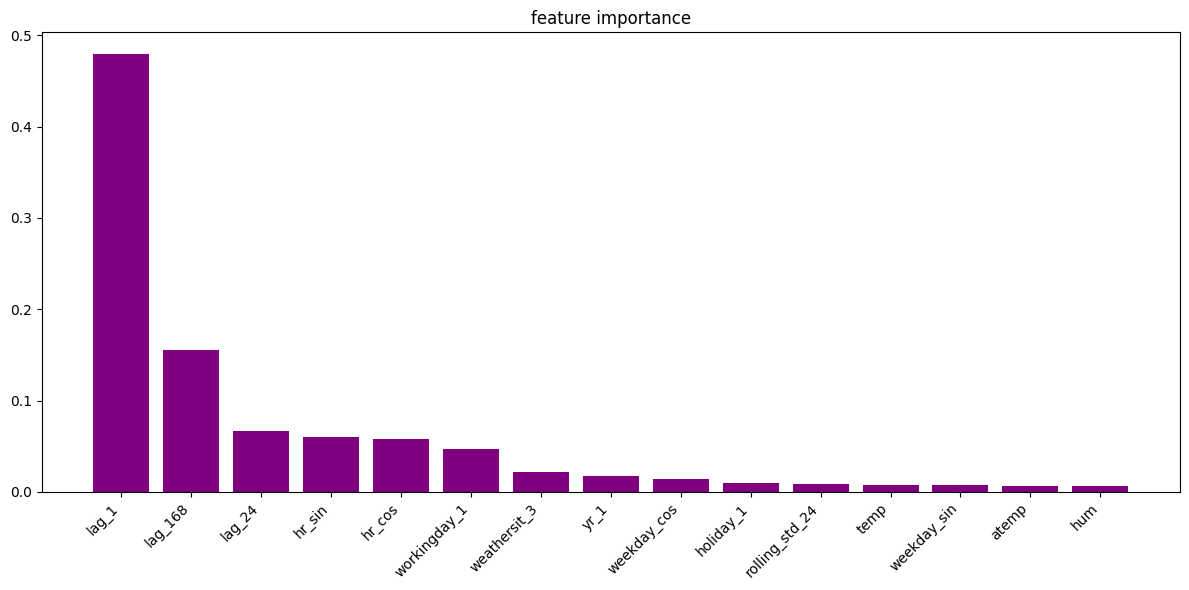

In [ ]:
# final eval

y_final_pred= best_model.predict(X_test)
final_mae = mean_absolute_error(y_test,y_final_pred)
final_rmse= np.sqrt(mean_squared_error(y_test,y_final_pred))
final_r2= r2_score(y_test,y_final_pred)

print(final_mae)
print(final_rmse)
print(final_r2)

# feat importance

ohe_cols =best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feat_name = numerical_features + list(ohe_cols)

print(all_feat_name)


importances=best_model.named_steps['model'].feature_importances_
print(importances)

# 15 feature ploting

indices= np.argsort(importances)[::-1][:15]

print("\n",indices)

plt.figure(figsize=(12,6))
plt.title("feature importance")
plt.bar(range(len(indices)),importances[indices],align = 'center',color = 'purple')
plt.xticks(range(len(indices)),[all_feat_name[i] for i in indices],rotation=45,ha='right')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Prediction Error')

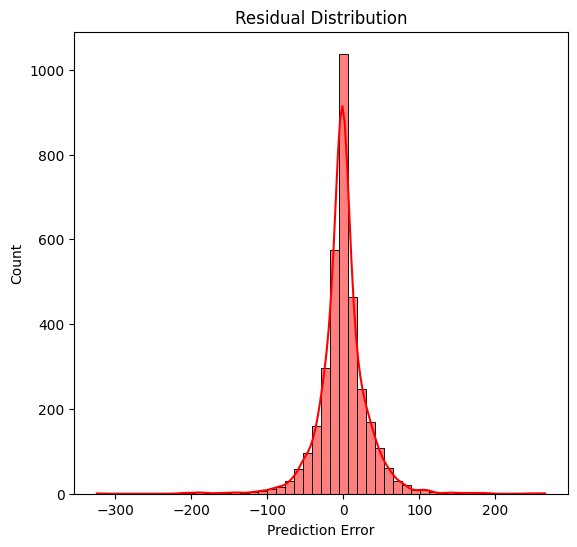

In [ ]:
residuals = y_test - y_final_pred

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(residuals,bins=50,kde=True,color='red')
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")

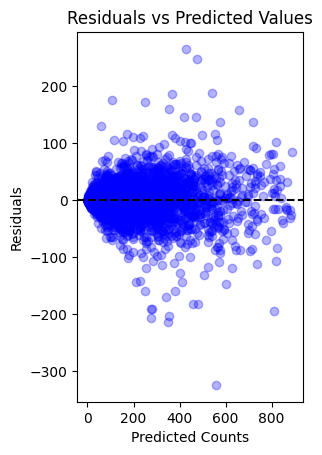

In [ ]:
# res vs pred
plt.subplot(1, 2, 2)
plt.scatter(y_final_pred, residuals, alpha=0.3, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Counts")
plt.ylabel("Residuals")
plt.show()

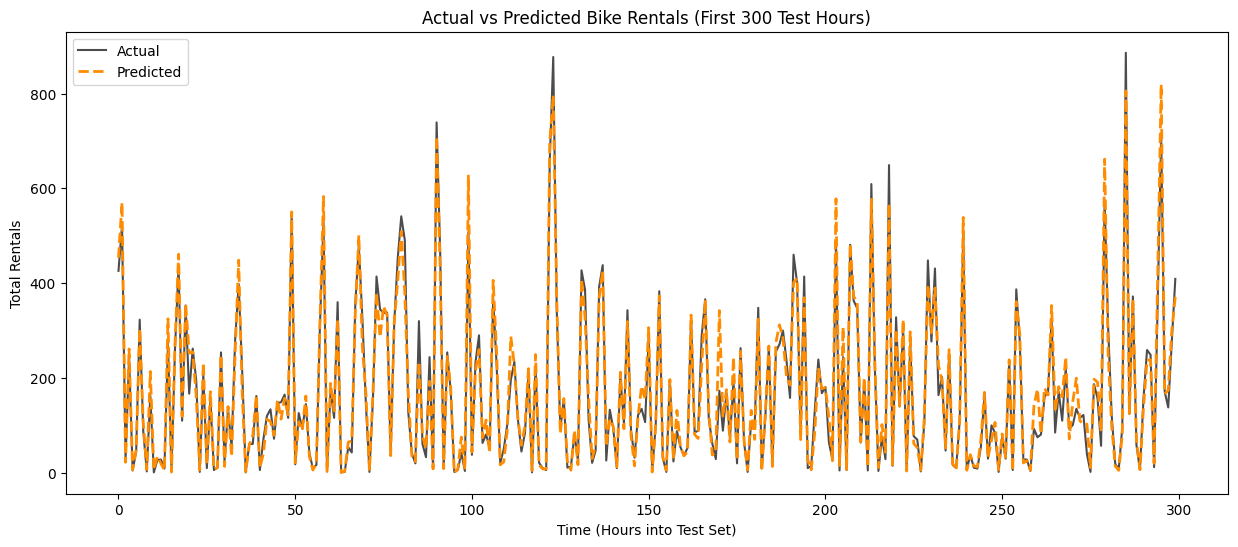

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:300], label='Actual', color='black', alpha=0.7)
plt.plot(y_final_pred[:300], label='Predicted', color='darkorange', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Bike Rentals (First 300 Test Hours)")
plt.legend()
plt.xlabel("Time (Hours into Test Set)")
plt.ylabel("Total Rentals")
plt.show()